<a href="https://colab.research.google.com/github/Karlajack/MachineLearning2_Advance/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convulutional Neural Networks and computer Vision with Tensorflow

## What We're going to cover
- Getting dataset to work with
- Architecture of the CNN
- Example
- Steps in modelling for binary classification problem set
  - Becoming one with the data
  - Preparing data for modelling
  - Creating a CNN model (Starting with a baseline)
  - Fit a model
  - Evaluate
  - IMprove the model
  - Make predictions with a trained model

In [ ]:
# Testing
import datetime
print(f"Notebook las run (end-to-end): {datetime.datetime.now()}")

Notebook las run (end-to-end): 2024-07-22 00:36:33.338137


# get the data

In [ ]:
import zipfile

# Download the zipfile of the pizza images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded zip
zip_ref = zipfile.ZipFile("pizza_steak.zip", 'r')
zip_ref.extractall()
zip_ref.close()

--2024-07-22 00:36:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   195MB/s    in 0.5s    

2024-07-22 00:36:34 (195 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data ( Becoming one with the data)

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through the pizza_steak directory and list the number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn the training path to a python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # List of class names from the subdirectories I have
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot with plt
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}") # Shows the shape of the image

  return img

Image shape: (512, 512, 3)


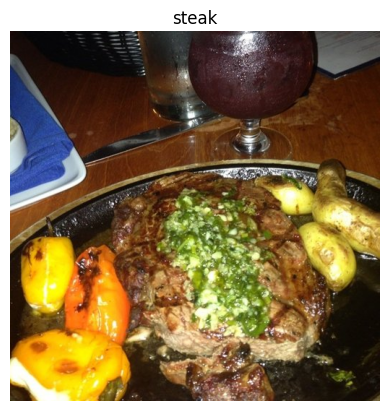

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="steak")

array([[[ 24,   6,   6],
        [ 26,   8,   8],
        [ 26,  10,  10],
        ...,
        [ 69,  65,  62],
        [ 69,  65,  62],
        [ 64,  60,  57]],

       [[ 27,   9,   9],
        [ 27,   9,   9],
        [ 26,  10,  10],
        ...,
        [ 65,  61,  58],
        [ 60,  56,  53],
        [ 55,  51,  48]],

       [[ 30,  12,  12],
        [ 28,  10,  10],
        [ 25,   9,   9],
        ...,
        [ 60,  56,  53],
        [ 61,  57,  54],
        [ 61,  57,  54]],

       ...,

       [[ 73,  62,  32],
        [ 70,  59,  29],
        [ 65,  54,  26],
        ...,
        [114, 100,  61],
        [109,  96,  54],
        [106,  93,  51]],

       [[ 63,  54,  23],
        [ 65,  56,  25],
        [ 66,  57,  26],
        ...,
        [119, 105,  66],
        [113,  98,  57],
        [106,  91,  48]],

       [[ 40,  34,   2],
        [ 49,  43,  11],
        [ 62,  53,  22],
        ...,
        [113, 100,  58],
        [108,  93,  52],
        [103,  88,  45]]], dtype=uint8)
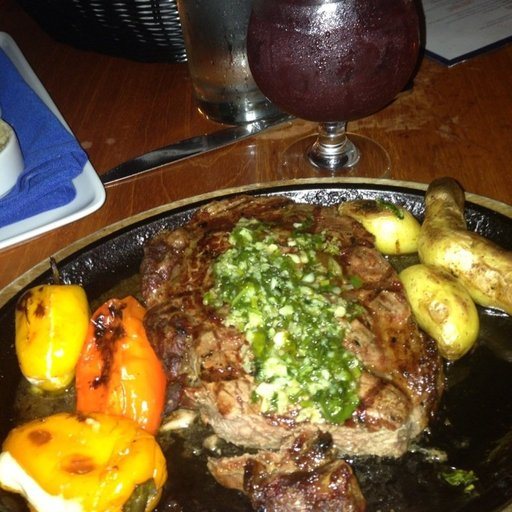

In [ ]:
img

In [ ]:
# View the shape of the img
img.shape

(512, 512, 3)

In [ ]:
# GEt all the pixel values between 0 and 1
img/255

array([[[0.09411765, 0.02352941, 0.02352941],
        [0.10196078, 0.03137255, 0.03137255],
        [0.10196078, 0.03921569, 0.03921569],
        ...,
        [0.27058824, 0.25490196, 0.24313725],
        [0.27058824, 0.25490196, 0.24313725],
        [0.25098039, 0.23529412, 0.22352941]],

       [[0.10588235, 0.03529412, 0.03529412],
        [0.10588235, 0.03529412, 0.03529412],
        [0.10196078, 0.03921569, 0.03921569],
        ...,
        [0.25490196, 0.23921569, 0.22745098],
        [0.23529412, 0.21960784, 0.20784314],
        [0.21568627, 0.2       , 0.18823529]],

       [[0.11764706, 0.04705882, 0.04705882],
        [0.10980392, 0.03921569, 0.03921569],
        [0.09803922, 0.03529412, 0.03529412],
        ...,
        [0.23529412, 0.21960784, 0.20784314],
        [0.23921569, 0.22352941, 0.21176471],
        [0.23921569, 0.22352941, 0.21176471]],

       ...,

       [[0.28627451, 0.24313725, 0.1254902 ],
        [0.2745098 , 0.23137255, 0.11372549],
        [0.25490196, 0

- Components of the cnn
  - Input Images
  - Input layer
  - Convolution layer
  - Hidden activation
  - Pooling layer
  - Fully connected layer
  - Output layer
  - Output activation

# End-to-end example

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#set seed
tf.random.set_seed(42)

# Preprocess the data(Normalization/scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup the train and test directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Import the data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, #The number of images to process at a time
                                               target_size = (224, 224), # Converts all images to shape 224, 224
                                               class_mode = 'binary', #type of the problem we are workin in
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)
# Create the CNN model - same as Tiny VGG
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3, # Can also be given as (3,3)
                           activation = 'relu',
                           input_shape = (224, 224, 3)), # the first layer specifies input shape
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'), # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # this is a binary activation output
])

# Compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 216ms/step - loss: 0.5864 - accuracy: 0.6940 - val_loss: 0.4580 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 7s 158ms/step - loss: 0.4621 - accuracy: 0.8007 - val_loss: 0.3747 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.4254 - accuracy: 0.8233 - val_loss: 0.4196 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4013 - accuracy: 0.8320 - val_loss: 0.3598 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3482 - accuracy: 0.8593 - val_loss: 0.3423 - val_accuracy: 0.8780


In [ ]:
# get the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Create a model to replicate the TF playground
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)), # Dense expects 1D vector
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 109ms/step - loss: 0.8278 - accuracy: 0.5540 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 146ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Look at the architecture of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Create a model to replicate the TF playground
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)), # Dense expects 1D vector
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'), # Added an extra layer
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 134ms/step - loss: 2.4145 - accuracy: 0.6113 - val_loss: 1.7114 - val_accuracy: 0.5140
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 1.3860 - accuracy: 0.6573 - val_loss: 1.2428 - val_accuracy: 0.6240
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.6045 - accuracy: 0.7407 - val_loss: 0.4437 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 5s 105ms/step - loss: 0.5674 - accuracy: 0.7533 - val_loss: 0.4467 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4654 - accuracy: 0.7980 - val_loss: 0.4198 - val_accuracy: 0.8160


In [ ]:
# Check the architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
